In [299]:
import numpy as np
from numpy.core.numeric import cross
import pandas as pd
from scipy.sparse.construct import rand
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

In [300]:
df = pd.read_csv('employee_retention.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1


In [301]:
X = df.iloc[:, 0:7]
y = df.iloc[:,7]
print (X)
print(y)

       satisfaction_level  ...  promotion_last_5years
0                    0.38  ...                      0
1                    0.80  ...                      0
2                    0.11  ...                      0
3                    0.72  ...                      0
4                    0.37  ...                      0
...                   ...  ...                    ...
14994                0.40  ...                      0
14995                0.37  ...                      0
14996                0.37  ...                      0
14997                0.11  ...                      0
14998                0.37  ...                      0

[14999 rows x 7 columns]
0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64


In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42)

In [303]:
model = SGDClassifier()
model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [304]:

model.predict(X_test)


array([0, 0, 1, ..., 0, 1, 1])

In [320]:
model.score(X_test,y_test)

0.47454545454545455

In [321]:
cross_val_score(model, X_train, y_train, cv=10, scoring = 'accuracy')

array([0.76218905, 0.75024876, 0.75721393, 0.76218905, 0.4039801 ,
       0.75621891, 0.77711443, 0.760199  , 0.76218905, 0.76095618])

In [322]:
y_train_pred = cross_val_predict(model, X_train, y_train, cv=10)

In [323]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[6585, 1074],
       [1724,  666]])

In [324]:
 from sklearn.metrics import precision_score, recall_score
 precision_score(y_train, y_train_pred)

0.38275862068965516

In [325]:
recall_score(y_train, y_train_pred)

0.27866108786610877

In [326]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.3225181598062954

In [327]:
y_scores = model.decision_function(X_test)
y_scores

array([-27.4631505 , -67.3711333 ,  42.23804996, ...,  -3.92934259,
       136.44720092, 269.64994073])

In [328]:
 threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [329]:
y_scores = cross_val_predict(model, X_train, y_train, cv=10,
 method="decision_function")


In [330]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


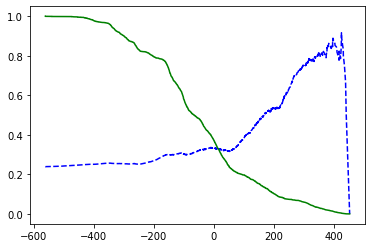

In [331]:
import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 [...] # highlight the threshold, add the legend, axis label and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


In [332]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

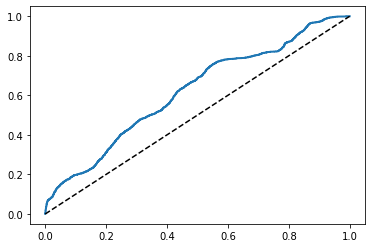

In [333]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()


In [334]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)


0.6188736854008821